<a href="https://colab.research.google.com/github/RenukaBenkalkar/Python/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Dataset Age-experience –income
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load dataset
from google.colab import files
d=files.upload()

Saving age_exp_income.csv to age_exp_income.csv


In [ ]:
#Read Dataset
df=pd.read_csv('age_exp_income.csv')
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [ ]:
df.dtypes

,0
age,int64
experience,int64
income,int64


In [ ]:
#Total number os rows and columns
df.shape

(20, 3)

In [ ]:
df.size

60

In [ ]:
df.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,20.0,39.65,10.027725,23.0,31.50,40.0,47.0,58.0
experience,20.0,6.20,4.124382,1.0,3.75,5.0,9.0,17.0
income,20.0,40735.50,8439.797625,27840.0,35452.50,40190.0,45390.0,63600.0


In [ ]:
#Remove duplicates
df.drop_duplicates()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [ ]:
#check for null values
df.isnull().sum()

,0
age,0
experience,0
income,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [ ]:
df.columns

Index(['age', 'experience', 'income'], dtype='object')

<Axes: xlabel='age', ylabel='income'>

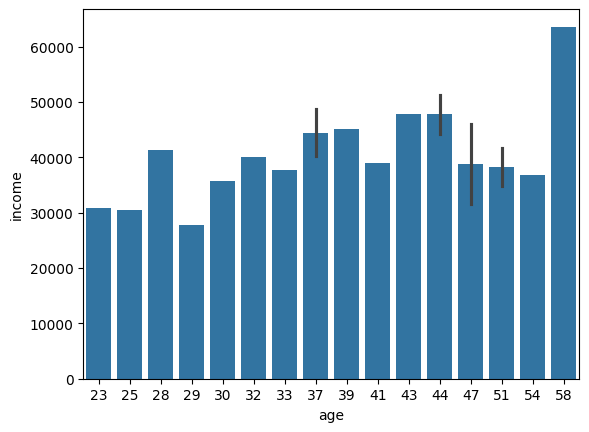

In [ ]:
#Visualization
sns.barplot(x='age',y='income',data=df)

<Axes: xlabel='experience', ylabel='income'>

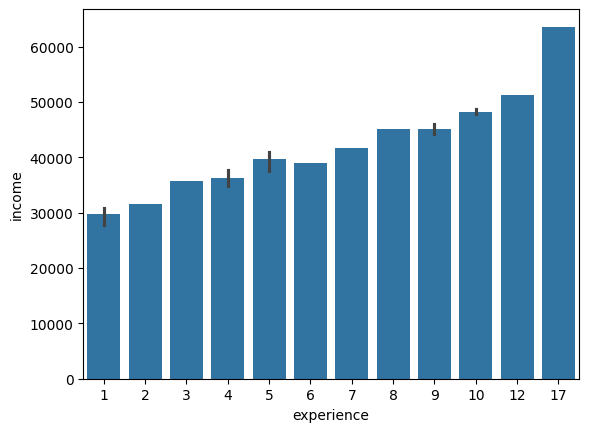

In [ ]:
#Visualization
sns.barplot(x='experience',y='income',data=df)

In [ ]:
# Correlation : relationship between columns
df.corr()

,age,experience,income
age,1.000000,0.615165,0.532204
experience,0.615165,1.000000,0.984227
income,0.532204,0.984227,1.000000


<Axes: >

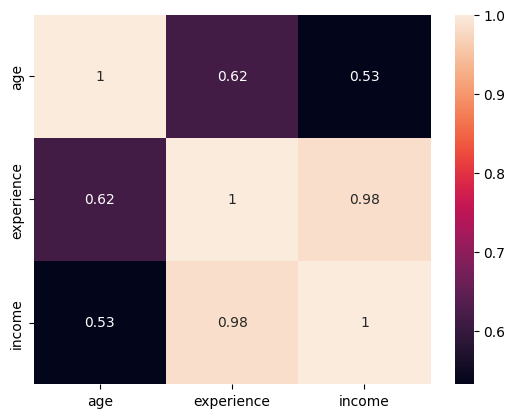

In [ ]:
# Visualise correlation
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.columns

Index(['age', 'experience', 'income'], dtype='object')

In [ ]:
# x axis is age,experience columns
x=df[['age','experience']]
x.head()

,age,experience
0,25,1
1,30,3
2,47,2
3,32,5
4,43,10


In [ ]:
# y - dependent variable, it depend on x
y=df['income']
y.head()

,income
0,30450
1,35670
2,31580
3,40130
4,47830


In [ ]:
# Train Test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
xtrain.shape

(16, 2)

In [ ]:
xtest.shape

(4, 2)

In [ ]:
ytrain.shape

(16,)

In [ ]:
ytest.shape

(4,)

In [ ]:
xtrain.head()

,age,experience
8,37,5
5,51,7
11,47,9
3,32,5
18,44,9


In [ ]:
xtest.head()

,age,experience
0,25,1
17,23,1
15,41,6
1,30,3


In [ ]:
ytrain.head()

,income
8,40250
5,41630
11,46110
3,40130
18,44190


In [ ]:
ytest.head()

,income
0,30450
17,30870
15,38900
1,35670


In [ ]:
# Standardization :convert input to same format
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [ ]:
xtrain

array([[-0.58553507, -0.52500136],
       [ 1.01397536, -0.01590913],
       [ 0.55697238,  0.49318309],
       [-1.15678879, -0.52500136],
       [ 0.21422015,  0.49318309],
       [ 1.81373058,  2.52955199],
       [ 1.01397536, -0.77954747],
       [ 0.55697238, -1.28863969],
       [-0.35703358,  0.23863698],
       [-0.58553507,  0.7477292 ],
       [ 0.0999694 ,  0.7477292 ],
       [ 1.3567276 , -0.52500136],
       [-1.04253805, -0.77954747],
       [-1.49954103, -1.5431858 ],
       [ 0.21422015,  1.25682143],
       [-1.61379177, -0.52500136]])

In [ ]:
xtest

array([[-0.68074565, -0.85518611],
       [-0.96737539, -0.85518611],
       [ 1.61229232,  1.58820278],
       [ 0.03582872,  0.12216944]])

<Axes: >

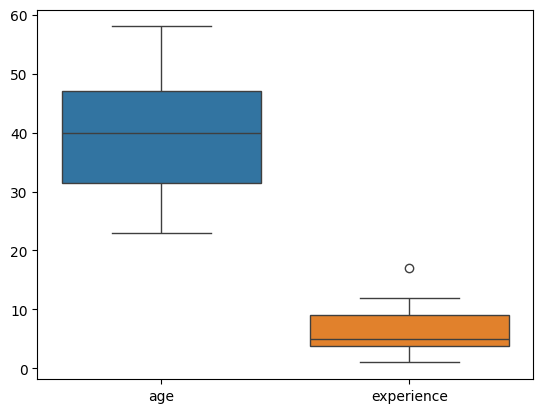

In [ ]:
# boxplot for original data
sns.boxplot(data=x)

<Axes: >

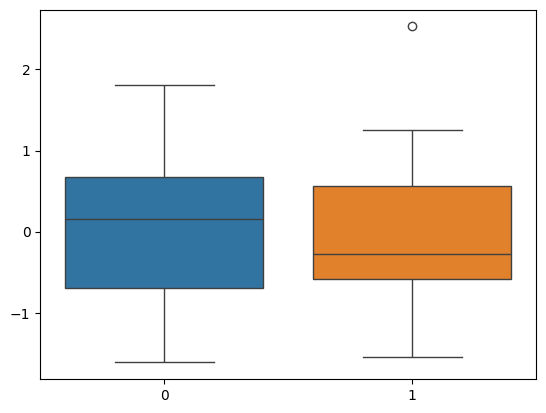

In [ ]:
# boxplot -- after standardization
sns.boxplot(data=xtrain)

In [ ]:
#Model building
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
ypred=mlr.predict(xtest)

In [ ]:
ypred

array([35789.00151479, 36042.53668784, 54444.70447669, 43428.75732069])

In [ ]:
errors =ytest-ypred
errors

,income
0,-5339.001515
17,-5172.536688
15,-15544.704477
1,-7758.757321


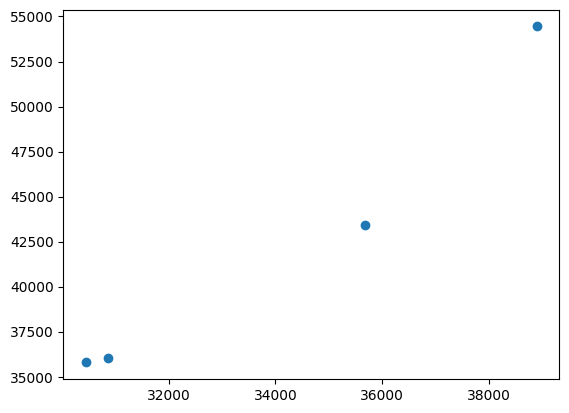

In [ ]:
#visualization
plt.scatter(ytest,ypred)

In [ ]:
#Evaluation matrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,root_mean_squared_error


In [ ]:
mean_absolute_error(ytest,ypred)

8453.75

In [ ]:
mean_squared_error(ytest,ypred)

89274056.3476927

In [ ]:
root_mean_squared_error(ytest,ypred)

9448.494924996927

In [ ]:
r2_score(ytest,ypred)

-6.258750467209926